In [1]:
import input
import numpy as np
import seaborn as sns

data = np.array([np.array(list(line), dtype=int) for line in input.read_input(8).splitlines()])

def get_visible_trees(tree_heights_row, initial_height=-np.inf):
    prev_max_height = initial_height
    is_visible = np.zeros(len(tree_heights_row))
    
    for i, height in enumerate(tree_heights_row):
        if height > prev_max_height:
            is_visible[i] = 1
            prev_max_height = height
    
    return is_visible


def get_viewing_distance(tree_heights_row, height):
    for i in range(len(tree_heights_row)):
        if tree_heights_row[i] >= height:
            return i + 1
        
    return len(tree_heights_row)


def get_scenic_score(tree_heights, x, y):
    top = get_viewing_distance(tree_heights[:y, x][::-1], tree_heights[y, x])
    right = get_viewing_distance(tree_heights[y, x+1:], tree_heights[y, x])
    bottom = get_viewing_distance(tree_heights[y+1:, x], tree_heights[y, x])
    left = get_viewing_distance(tree_heights[y, :x][::-1], tree_heights[y, x])
    return top * right * bottom * left

1715


<AxesSubplot: >

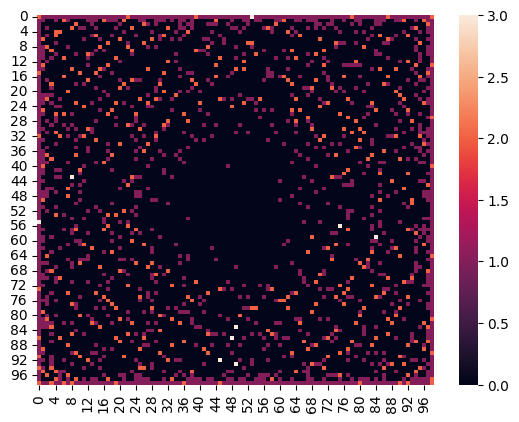

In [2]:
visible_trees = np.zeros(data.shape)

for y, row in enumerate(data):
    visible_trees[y] += get_visible_trees(row) + get_visible_trees(row[::-1])[::-1]
    
for x, col in enumerate(data.T):
    visible_trees[:, x] += get_visible_trees(col) + get_visible_trees(col[::-1])[::-1]

print(np.count_nonzero(visible_trees))

sns.heatmap(visible_trees)

374400


<AxesSubplot: >

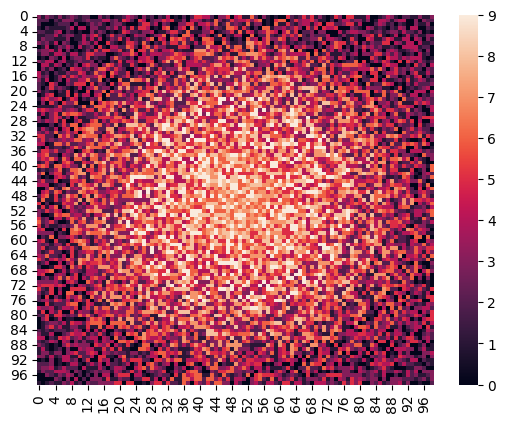

In [3]:
scenic_scores = [get_scenic_score(data, x, y) for y in range(data.shape[0]) for x in range(data.shape[1])]
print(max(scenic_scores))

sns.heatmap(data)